**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_coverage_fcc", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.coverage.zscore.final.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_fcc = dat
print(dim(dat))
head(dat)

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "cluster_phenograph"
)
txt_fname = "cluster.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_cluster = dat
print(dim(dat))
head(dat)

[1] 18341     2


Cluster,Region
<dbl>,<chr>
0,chr1:100036895-100039189
0,chr1:100132375-100133491
0,chr1:100265562-100266994
13,chr1:10032429-10033763
0,chr1:100362769-100363401
1,chr1:100400445-100400762


## Arrange table

In [6]:
dat = dat_region_score_fcc
table(dat$Assay_Group)


   ASTARR_KS91 CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
        150040          72743            941          61478            823 
        WSTARR 
        146480 

In [7]:
dat = dat_region_score_fcc
table(dat$Assay_Label)


          ATAC-STARR       CRISPRi-Growth CRISPRi-HCR FlowFISH 
              150040                72743                  941 
          Lenti-MPRA          Tiling-MPRA            WHG-STARR 
               61478                  823               146480 

In [10]:
dat = dat_region_score_fcc
print(dim(dat))

dat = dat %>%
    dplyr::select(Region, Assay_Label, Score) %>%
    dplyr::distinct()

dat_reigon_score = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9
[1] 432505      3


Region,Assay_Label,Score
chr10:100729094-100729750,CRISPRi-HCR FlowFISH,-0.3065107
chr10:100743501-100744571,CRISPRi-HCR FlowFISH,-0.2702473
chr10:100745413-100745741,CRISPRi-HCR FlowFISH,0.1130381


In [16]:
dat = dat_region_cluster
dat = dat %>% 
    dplyr::mutate(Group = str_pad(Cluster, width = 2, pad = "0")) %>%
    dplyr::mutate(Group = paste("Cluster", Group))
dat_region_group = dat
print(dim(dat))
head(dat)

[1] 18341     3


Cluster,Region,Group
<dbl>,<chr>,<chr>
0,chr1:100036895-100039189,Cluster 00
0,chr1:100132375-100133491,Cluster 00
0,chr1:100265562-100266994,Cluster 00
13,chr1:10032429-10033763,Cluster 13
0,chr1:100362769-100363401,Cluster 00
1,chr1:100400445-100400762,Cluster 01


In [31]:
dat = dplyr::left_join(
    dat_region_group,
    dat_reigon_score,
    by = "Region"
)
dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 67773     5


Cluster,Region,Group,Assay_Label,Score
<dbl>,<chr>,<chr>,<chr>,<dbl>
0,chr1:100036895-100039189,Cluster 00,CRISPRi-Growth,-0.05130039
0,chr1:100036895-100039189,Cluster 00,Lenti-MPRA,1.83275059
0,chr1:100036895-100039189,Cluster 00,ATAC-STARR,1.71301173
0,chr1:100036895-100039189,Cluster 00,WHG-STARR,2.22355898
0,chr1:100132375-100133491,Cluster 00,CRISPRi-Growth,-1.54124905
0,chr1:100132375-100133491,Cluster 00,Lenti-MPRA,0.79164205


In [32]:
sum(is.na(dat$Score))

[1] 0

In [33]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::group_by(Assay_Label) %>% 
    dplyr::summarize(
        Mean = mean(Score), 
        Var = var(Score),
        .groups = "drop"
    )
dat

Assay_Label,Mean,Var
<chr>,<dbl>,<dbl>
ATAC-STARR,1.0037270,1.733893
CRISPRi-Growth,0.2082180,2.126712
CRISPRi-HCR FlowFISH,0.1590020,1.892312
Lenti-MPRA,0.8817344,1.145847
Tiling-MPRA,0.7802263,1.114373
WHG-STARR,1.1248020,1.448665


Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”


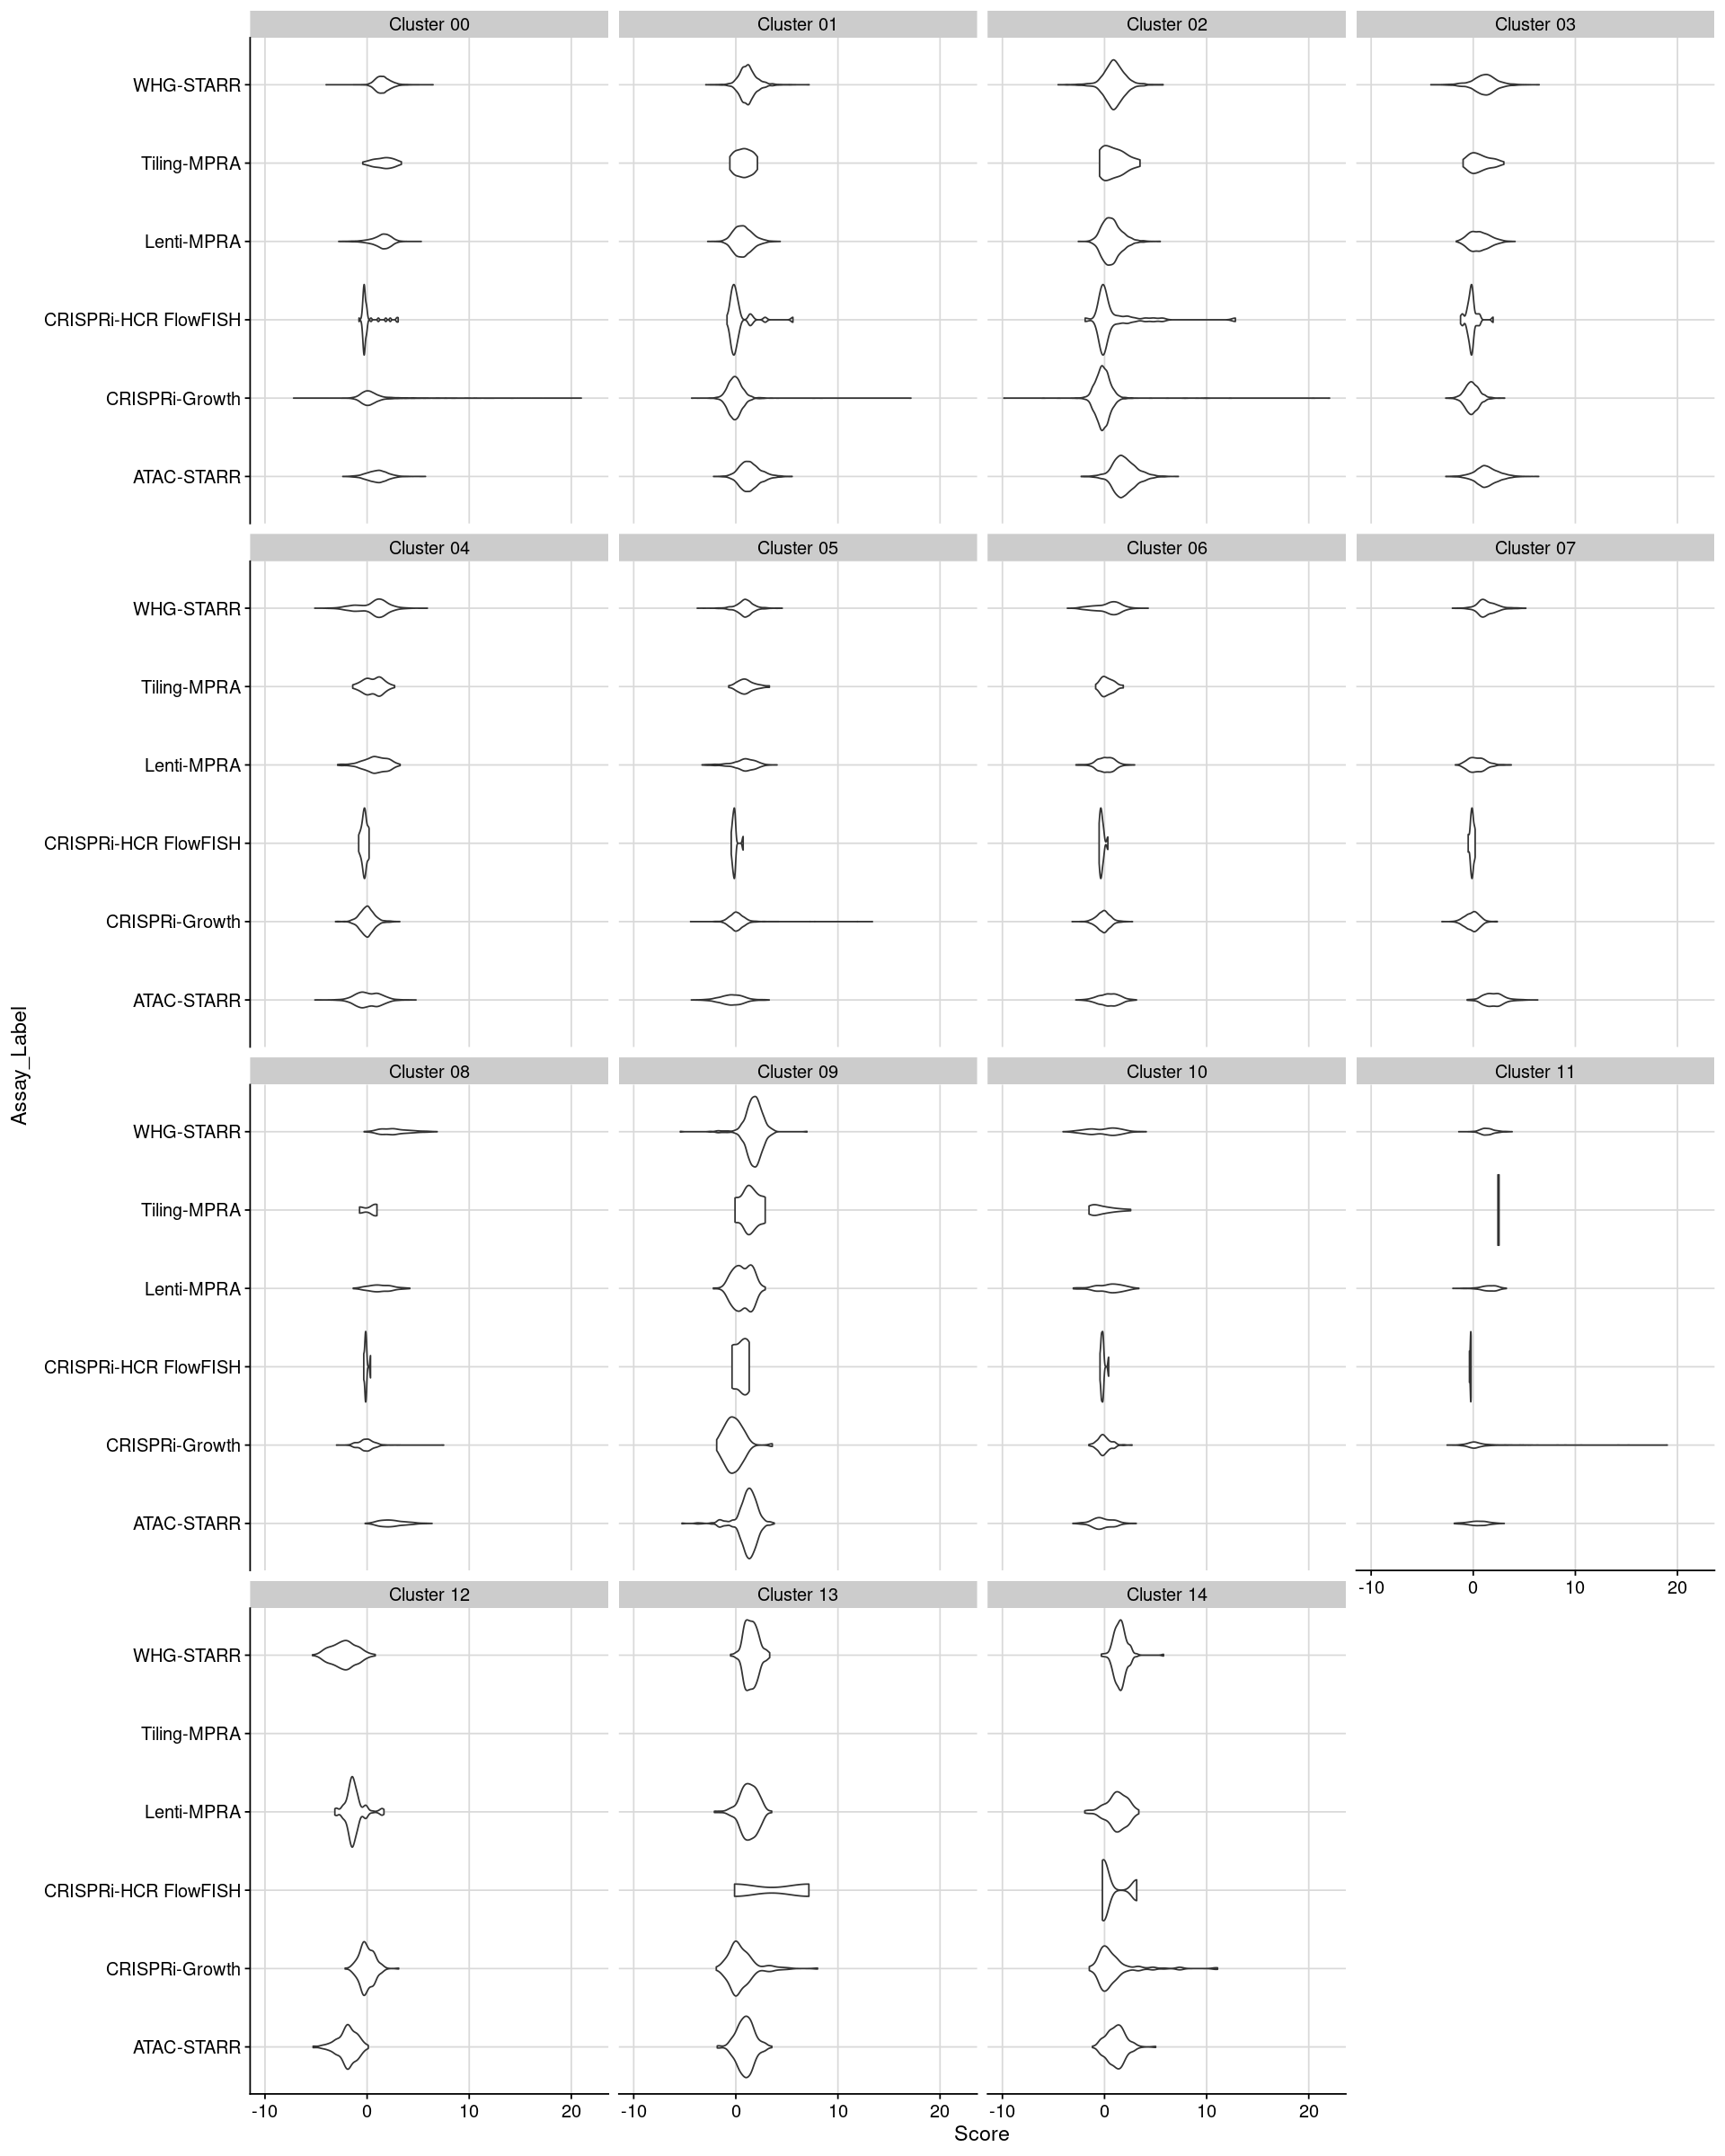

In [34]:
dat = dat_region_merge
gpt = ggplot(dat, aes(x=Score, y=Assay_Label)) + 
    geom_violin() + 
    facet_wrap(~Group) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=16, repr.plot.height=20)
print(gpt)

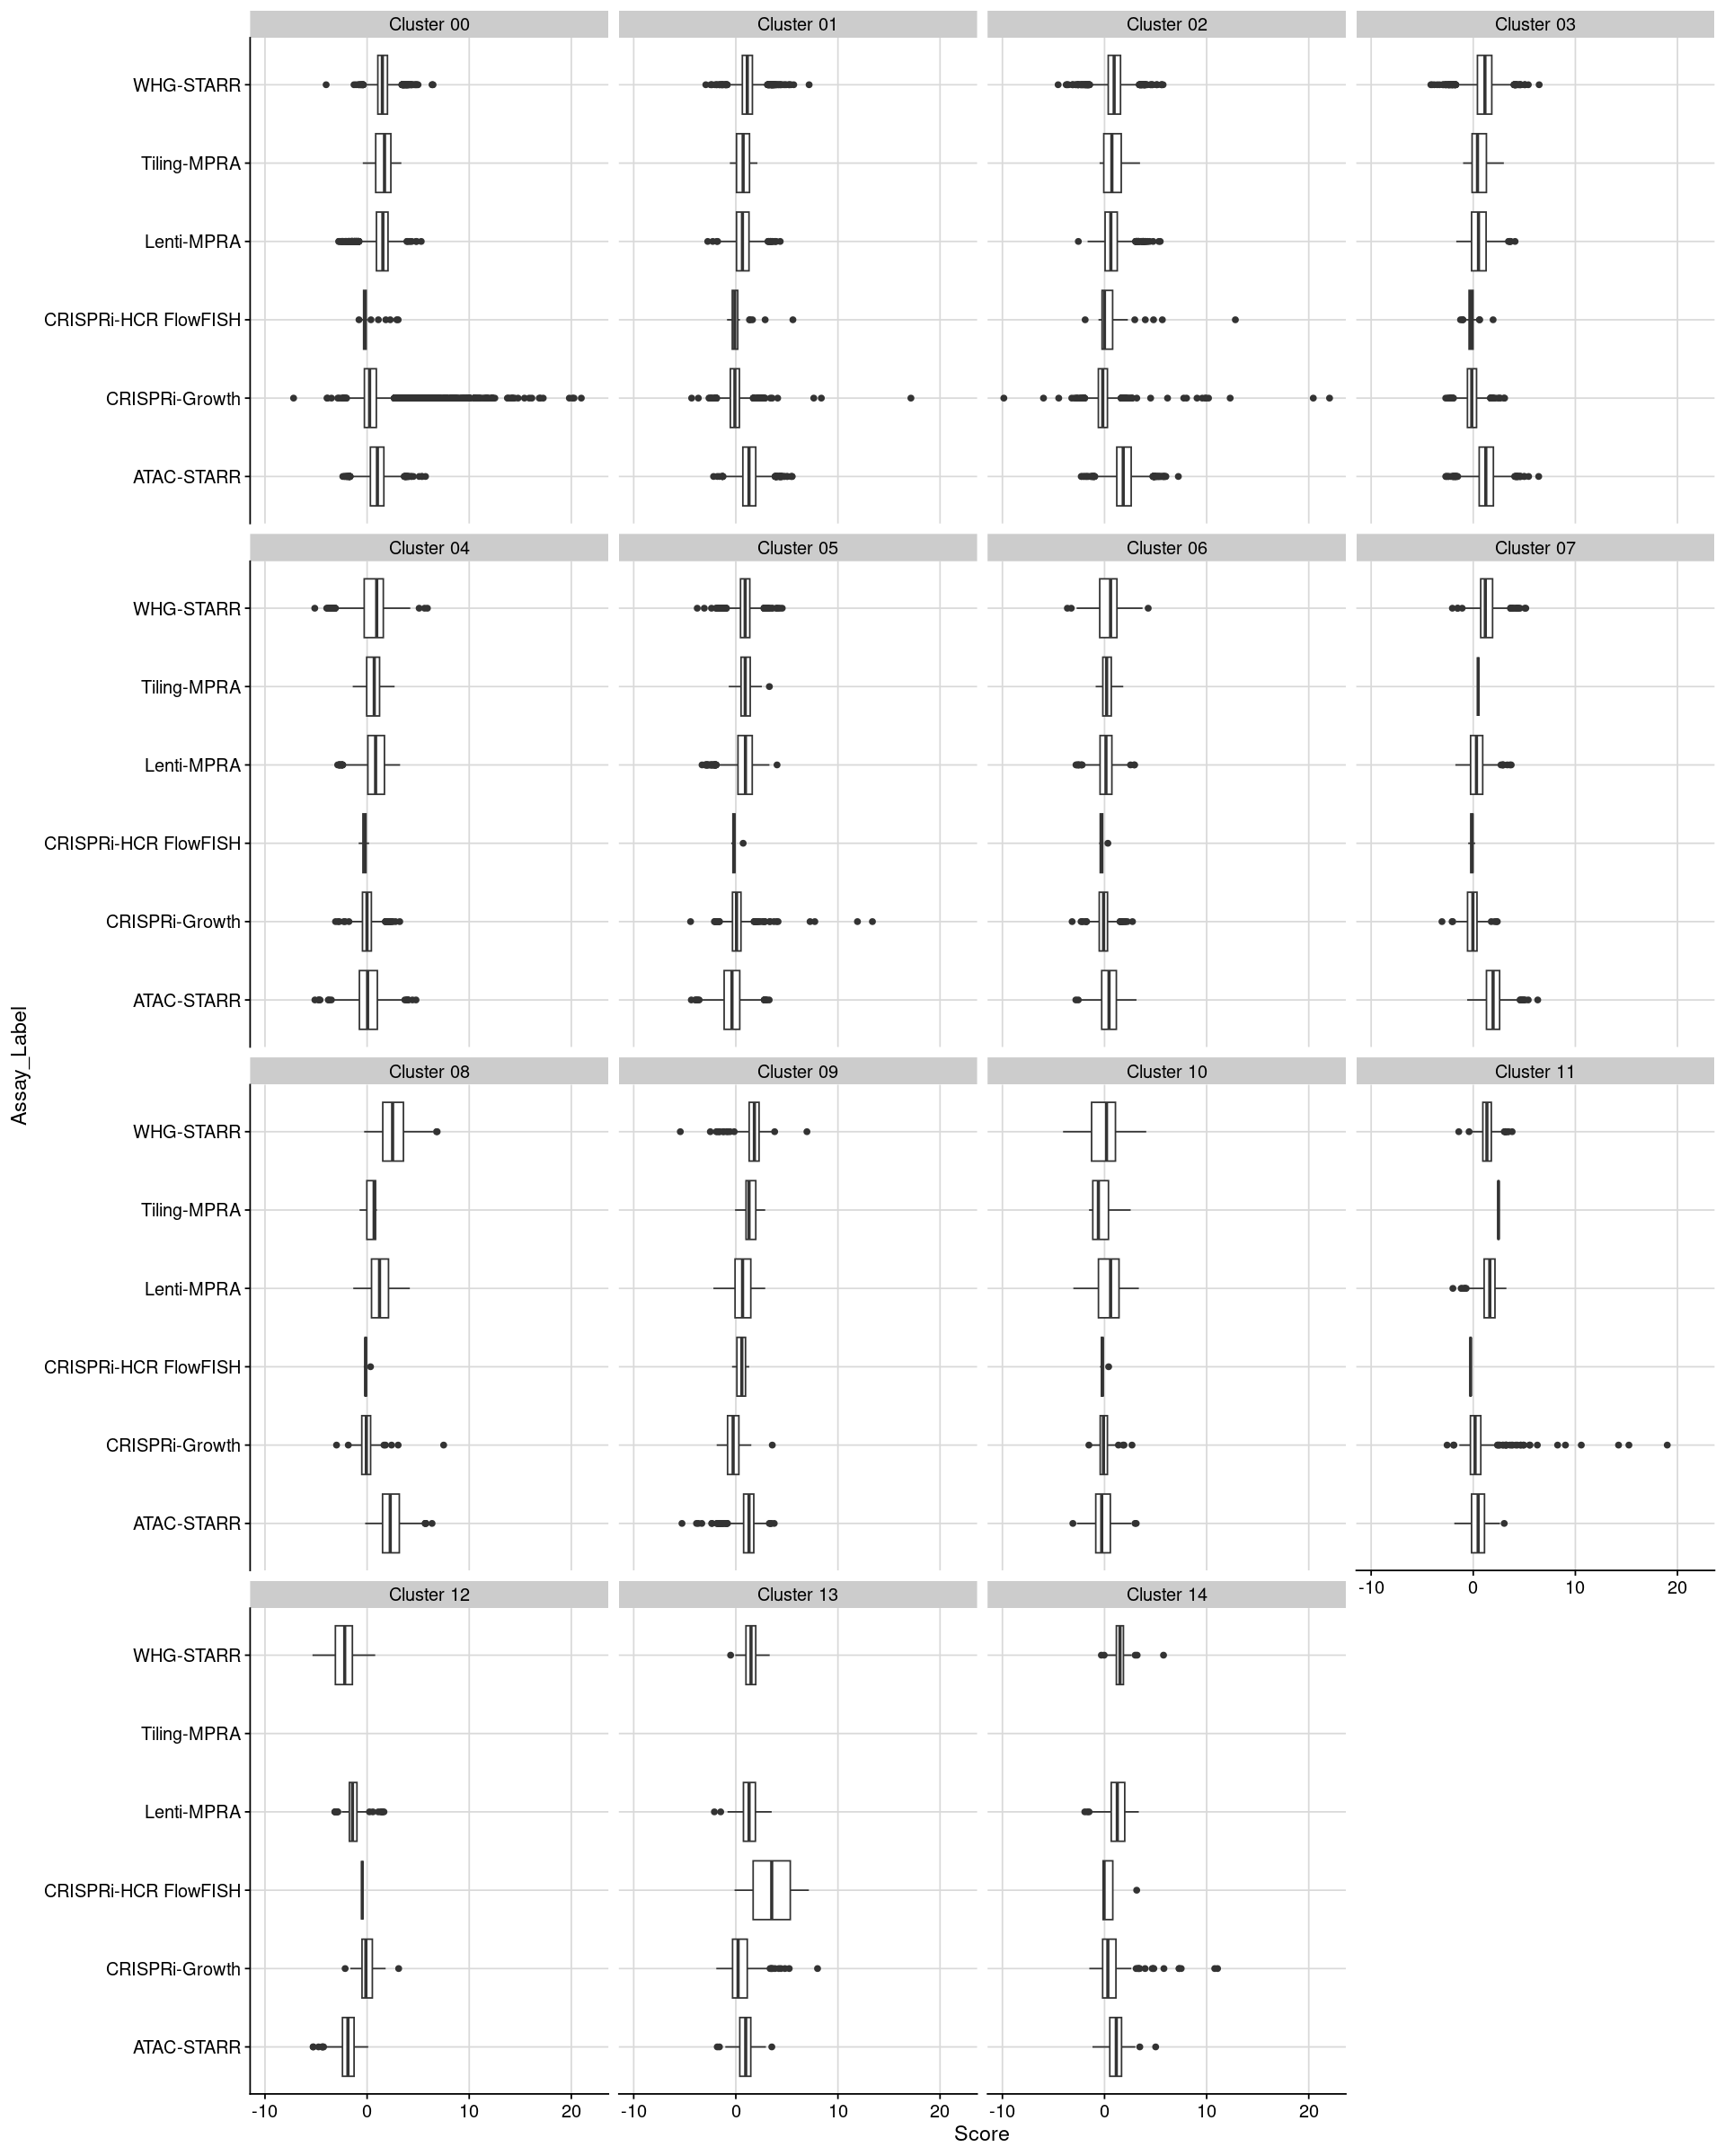

In [35]:
dat = dat_region_merge
gpt = ggplot(dat, aes(x=Score, y=Assay_Label)) + 
    geom_boxplot() + 
    facet_wrap(~Group) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=16, repr.plot.height=20)
print(gpt)

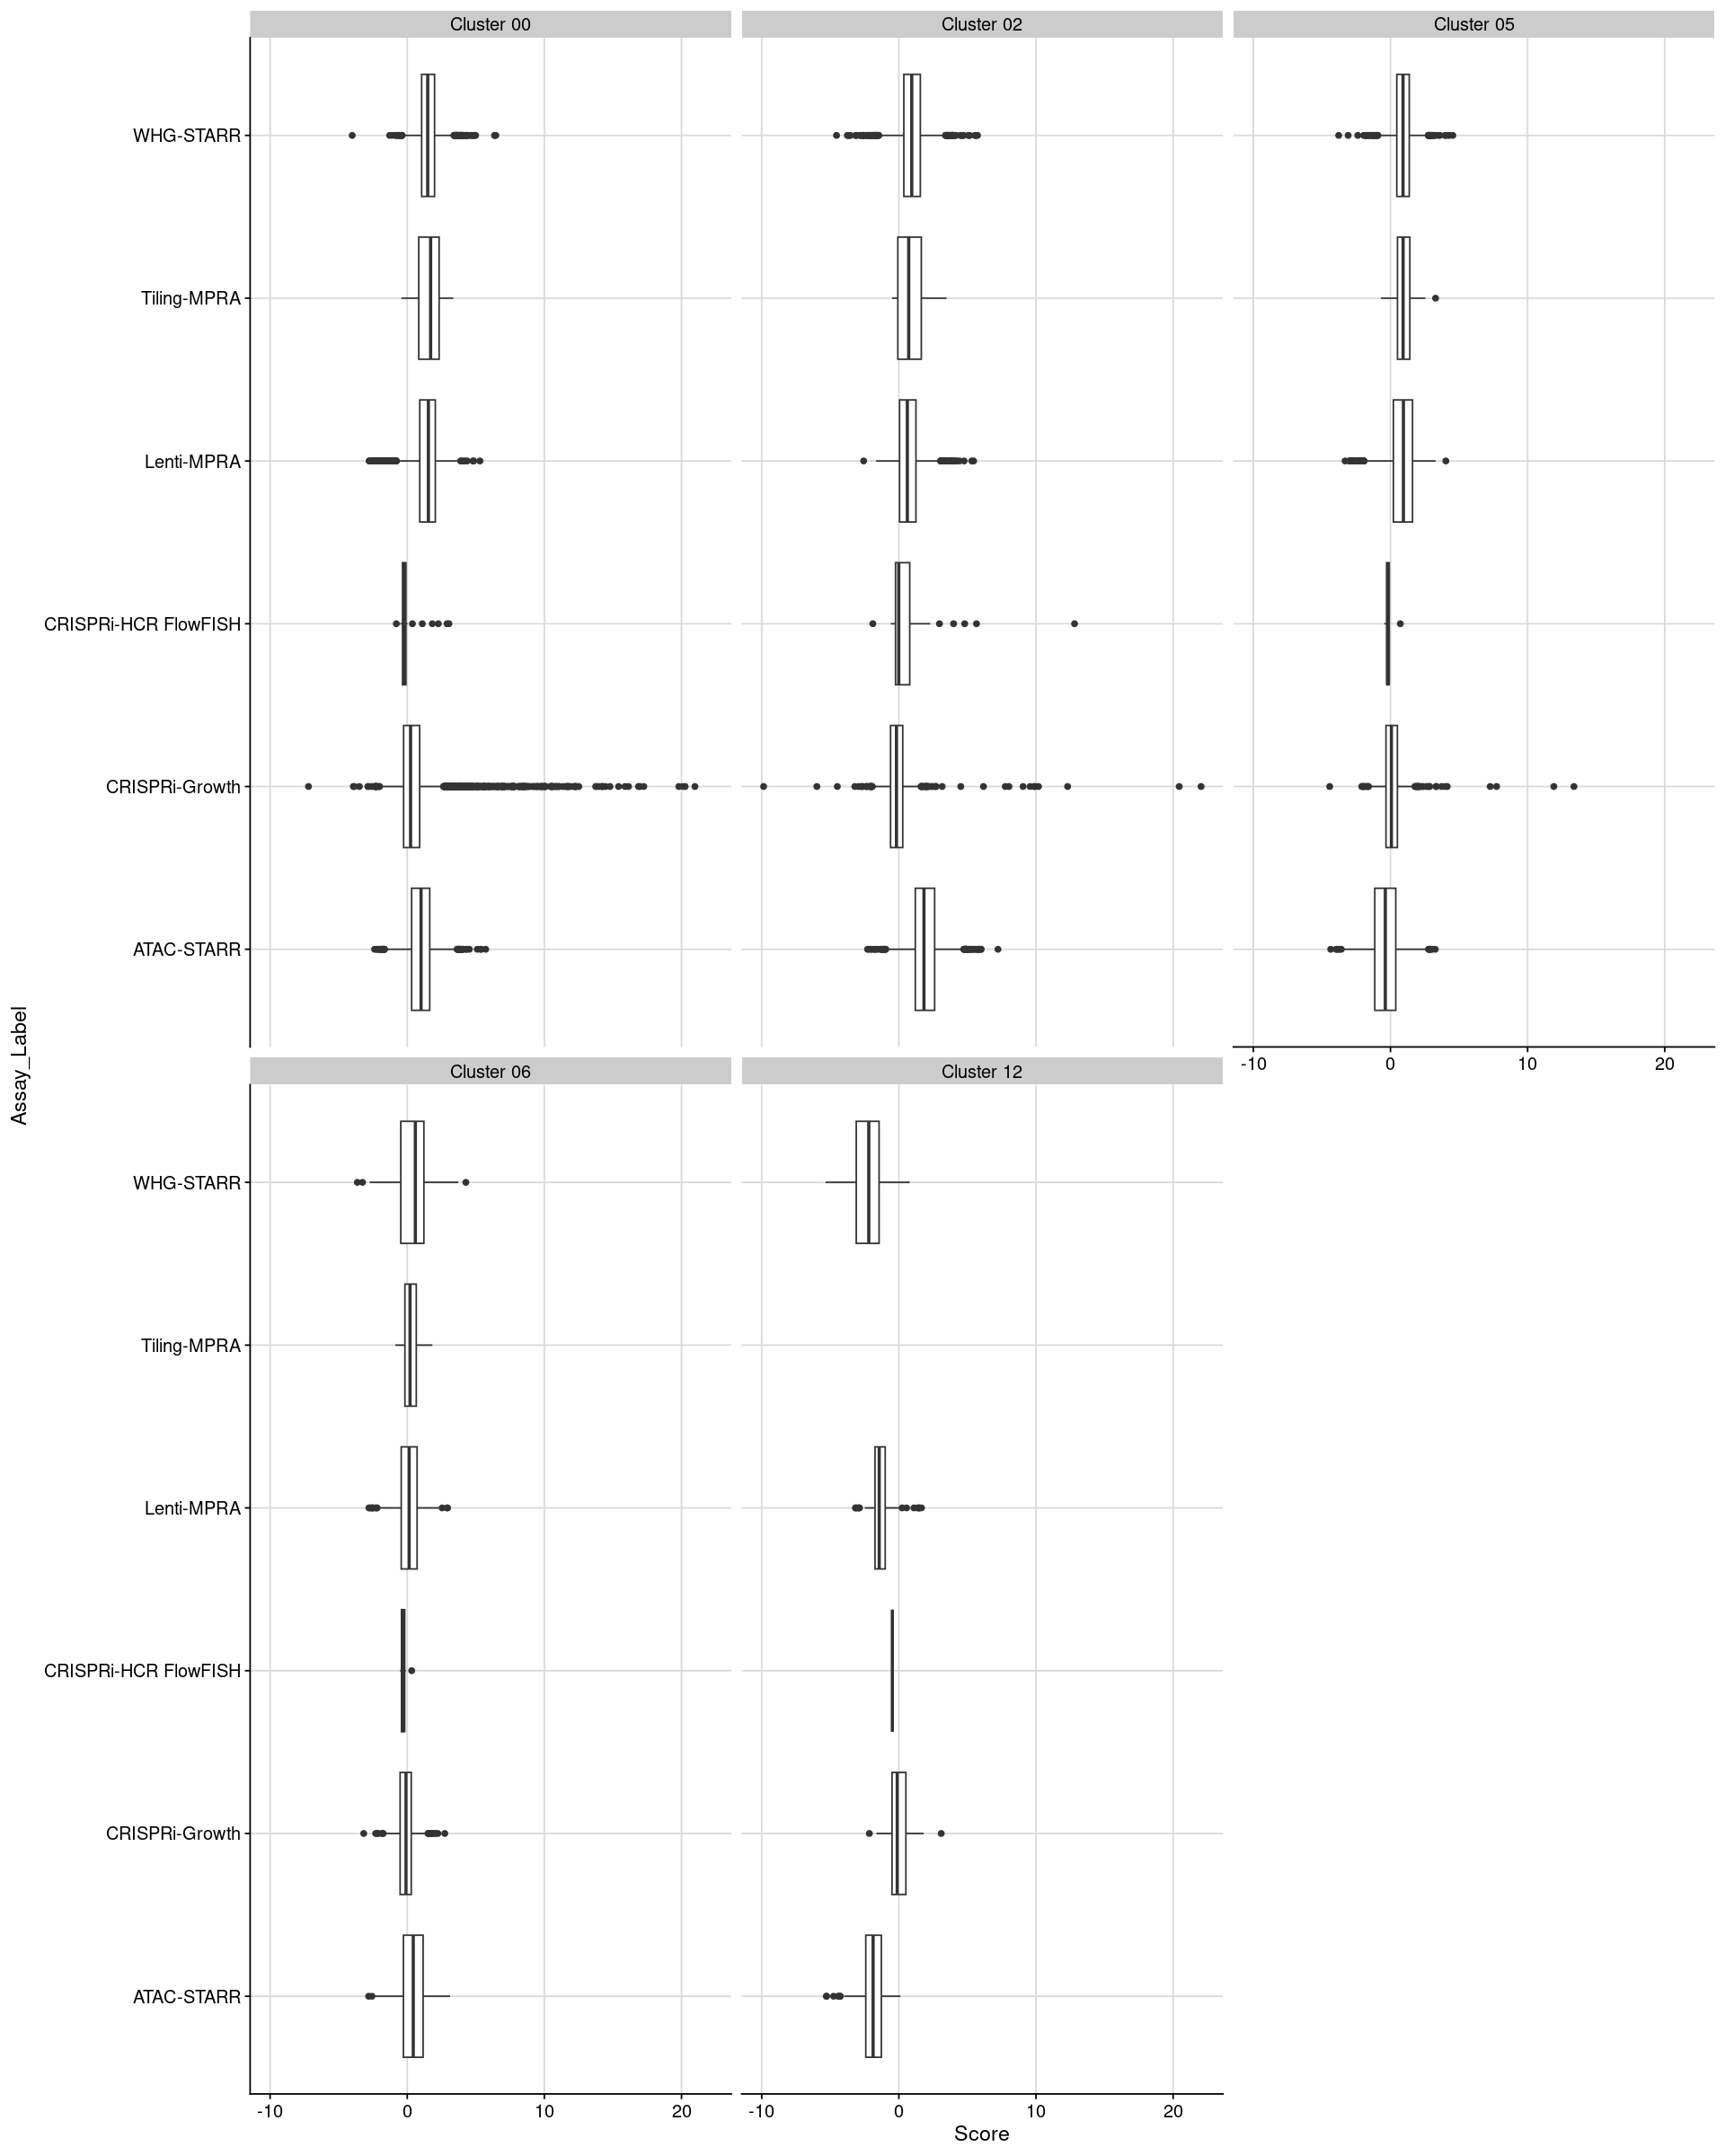

In [36]:
dat = dat_region_merge
dat = dat %>% dplyr::filter(Group %in% c("Cluster 00", "Cluster 02", "Cluster 05", "Cluster 06", "Cluster 12"))
gpt = ggplot(dat, aes(x=Score, y=Assay_Label)) + 
    geom_boxplot() + 
    facet_wrap(~Group) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=16, repr.plot.height=20)
print(gpt)

In [37]:
fun_bstrap_interveral = function(vec_num, fun = `mean`, num_iteration = 1000, num_seed = 123){
    ### init
    set.seed(num_seed)
    
    ### column: num_iteraction
    ### row:    length(vec_num)
    mat = replicate(
        num_iteration,
        sample(vec_num, replace = TRUE)
    )

    vec = apply(mat, 2, fun)
    res = quantile(vec, probs = c(0, 0.025, 0.25, 0.5, 0.75, 0.975, 1))
    res = c(res, mean(vec))
    names(res) = c("Min", "Ci95_Lw", "Q1", "Q2", "Q3", "Ci95_Up", "Max", "Mean")
    return(res)
}

In [40]:
dat = dat_region_merge

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Score, dat$Group)
    lst_inner = lapply(lst_inner, fun_bstrap_interveral)
    dat = bind_rows(lst_inner, .id = "Group")
    return(dat)
})

dat = bind_rows(lst, .id = "Assay_Label")
dat_peak_score_summary = dat
head(dat)

ERROR: Error in apply(mat, 2, fun): dim(X) must have a positive length


In [47]:
dat = dat_region_merge
lst = split(dat, dat$Assay_Label)
lapply(lst, nrow)

$`ATAC-STARR`
[1] 18341

$`CRISPRi-Growth`
[1] 15237

$`CRISPRi-HCR FlowFISH`
[1] 223

$`Lenti-MPRA`
[1] 15391

$`Tiling-MPRA`
[1] 262

$`WHG-STARR`
[1] 18319

In [54]:
dat = dat_region_merge

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Score, dat$Group)
    lst_inner = lapply(lst_inner, length)
    dat = bind_rows(lst_inner, .id = "Group")
    return(dat)
})

dat = bind_rows(lst, .id = "Assay_Label")

In [55]:
dat

Assay_Label,Cluster 00,Cluster 01,Cluster 02,Cluster 03,Cluster 04,Cluster 05,Cluster 06,Cluster 07,Cluster 08,Cluster 09,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ATAC-STARR,4629,2508,2341,2301,1876,1087,846,557,480,464,404,333,211,166,138
CRISPRi-Growth,4610,2378,2196,1620,707,1027,817,492,317,60,170,333,206,166,138
CRISPRi-HCR FlowFISH,44,33,38,32,15,11,11,9,7,3,9,4,1,2,4
Lenti-MPRA,4329,2266,2235,1887,937,903,773,503,399,259,166,314,134,157,129
Tiling-MPRA,41,29,22,37,58,27,18,1,3,5,19,2,NA,NA,NA
WHG-STARR,4629,2505,2335,2296,1876,1087,844,554,479,462,404,333,211,166,138


In [60]:
dat = dat_region_merge

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Score, dat$Group)
    lst_inner = lapply(lst_inner, length)
    print(unique(dat$Assay_Label))
    print(names(lst_inner))
    print(length(names(lst_inner)))
    cat("\n")
})

[1] "ATAC-STARR"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "CRISPRi-Growth"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "CRISPRi-HCR FlowFISH"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "Lenti-MPRA"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "Tiling-MPRA"
 [1] "Cluster 00" "Cluster 0

In [61]:
dat = dat_region_merge

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Score, dat$Group)
    lst_inner = lapply(lst_inner, length)

    vec = unlist(lst_inner)
    idx = (vec >= 10)
    lst_inner = lst_inner[idx]
    
    print(unique(dat$Assay_Label))
    print(names(lst_inner))
    print(length(names(lst_inner)))
    cat("\n")
})

[1] "ATAC-STARR"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "CRISPRi-Growth"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "CRISPRi-HCR FlowFISH"
[1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
[6] "Cluster 05" "Cluster 06"
[1] 7

[1] "Lenti-MPRA"
 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"
[1] 15

[1] "Tiling-MPRA"
[1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
[6] "Cluster 05" "Cluster 06" "Cluster 10"
[1] 8

[1] "WHG-STARR"
 [1] 

In [76]:
dat = dat_region_merge

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Score, dat$Group)
    
    tmp = lapply(lst_inner, length)
    vec = unlist(tmp)
    idx = (vec >= 10)
    
    lst_inner = lst_inner[idx]
    lst_inner = lapply(lst_inner, fun_bstrap_interveral)
    
    dat = bind_rows(lst_inner, .id = "Group")
    return(dat)
})

dat = bind_rows(lst, .id = "Assay_Label")
dat_region_score_summary = dat
print(dim(dat))
head(dat)

[1] 75 10


Assay_Label,Group,Min,Ci95_Lw,Q1,Q2,Q3,Ci95_Up,Max,Mean
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATAC-STARR,Cluster 00,0.92573824,0.94539534,0.96566655,0.9756504,0.9856289,1.0053878,1.0217938,0.9757809
ATAC-STARR,Cluster 01,1.29668431,1.32861695,1.35638574,1.3702855,1.3831470,1.4091842,1.4384555,1.3694266
ATAC-STARR,Cluster 02,1.87579463,1.89481400,1.92433656,1.9416889,1.9581307,1.9892809,2.0086655,1.9413384
ATAC-STARR,Cluster 03,1.21502372,1.24268530,1.27449032,1.2894174,1.3054703,1.3352593,1.3817737,1.2894850
ATAC-STARR,Cluster 04,0.02886078,0.06473565,0.09930089,0.1162961,0.1348154,0.1763084,0.2468338,0.1175925
ATAC-STARR,Cluster 05,-0.48192484,-0.45026788,-0.40686571,-0.3857272,-0.3632293,-0.3178945,-0.2605466,-0.3848692


In [77]:
dat = dat_region_score_summary
table(dat$Group)


Cluster 00 Cluster 01 Cluster 02 Cluster 03 Cluster 04 Cluster 05 Cluster 06 
         6          6          6          6          6          6          6 
Cluster 07 Cluster 08 Cluster 09 Cluster 10 Cluster 11 Cluster 12 Cluster 13 
         4          4          4          5          4          4          4 
Cluster 14 
         4 

In [78]:
dat = dat_region_score_summary
unique(dat$Group)

[1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"

In [85]:
dat = dat_region_score_summary
vec = unique(dat$Group)
vec_txt_label = vec
print(vec)

 [1] "Cluster 00" "Cluster 01" "Cluster 02" "Cluster 03" "Cluster 04"
 [6] "Cluster 05" "Cluster 06" "Cluster 07" "Cluster 08" "Cluster 09"
[11] "Cluster 10" "Cluster 11" "Cluster 12" "Cluster 13" "Cluster 14"


In [86]:
#dat = dat_region_score_summary
#vec = unique(dat$Assay_Label)
#vec_txt_assay = vec
#print(vec)

In [87]:
vec_txt_color = c(
    "ATAC-STARR" = "#fb8072", 
    "WHG-STARR" = "#80b1d3", 
    "Tiling-MPRA"  = "#8dd3c7", 
    "Lenti-MPRA"  = "#ff7f00",
    "CRISPRi-HCR FlowFISH"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

vec_txt_assay = names(vec_txt_color)

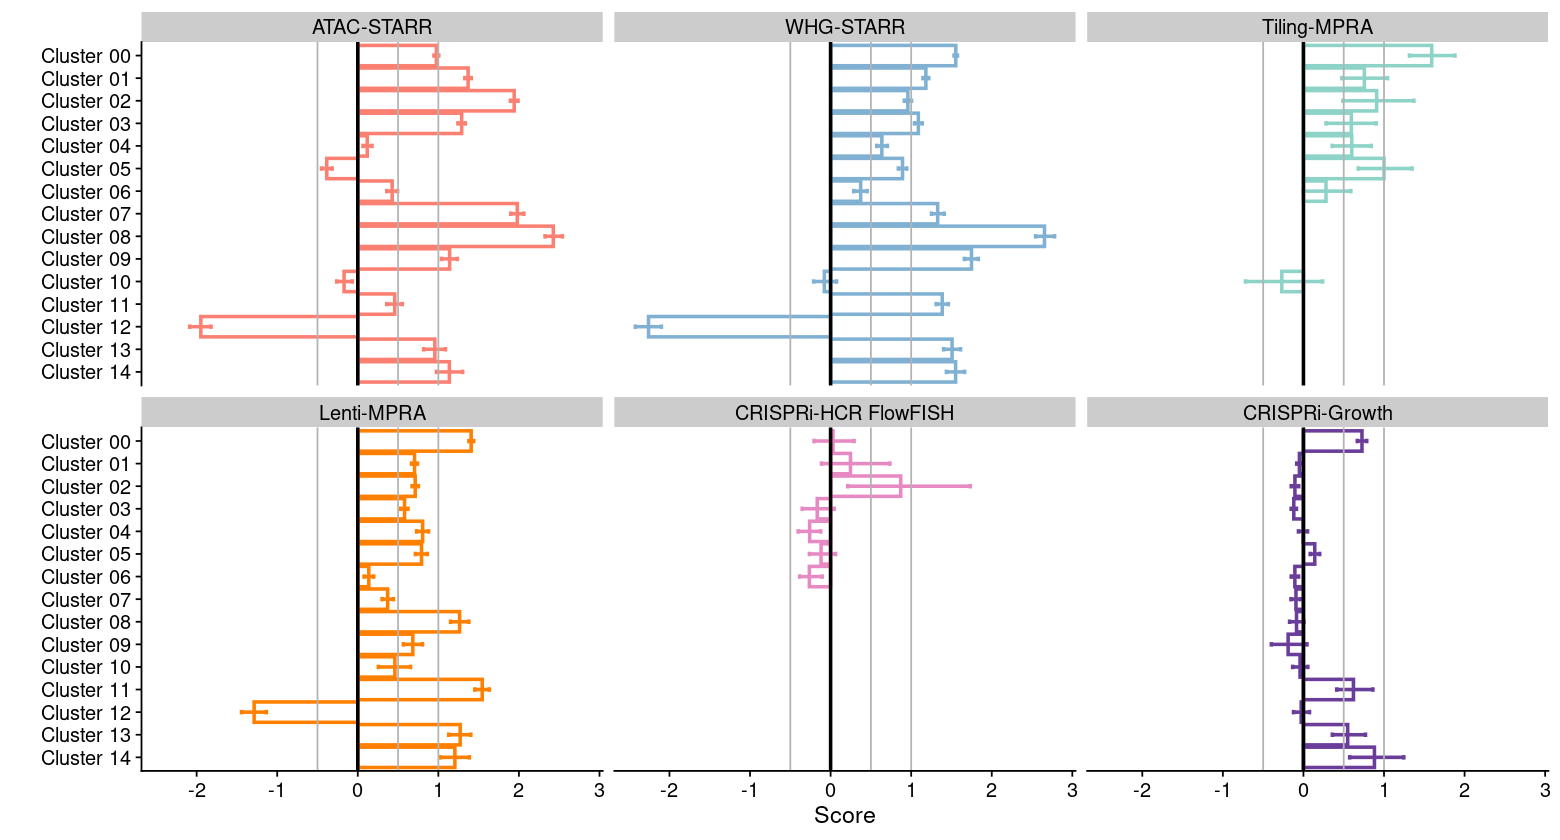

In [88]:


dat = dat_region_score_summary
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::filter(Assay %in% vec_txt_assay) %>%
    dplyr::filter(Group %in% vec_txt_label) %>%
    dplyr::mutate(
        Group = factor(Group, levels=rev(vec_txt_label)),
        Assay = factor(Assay, levels=vec_txt_assay)
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Group, 
            y     = Mean,
            group = Assay,
            color = Assay
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Group, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay, 
            color = Assay
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay, nrow=2) +
    theme(legend.position = "None")

options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

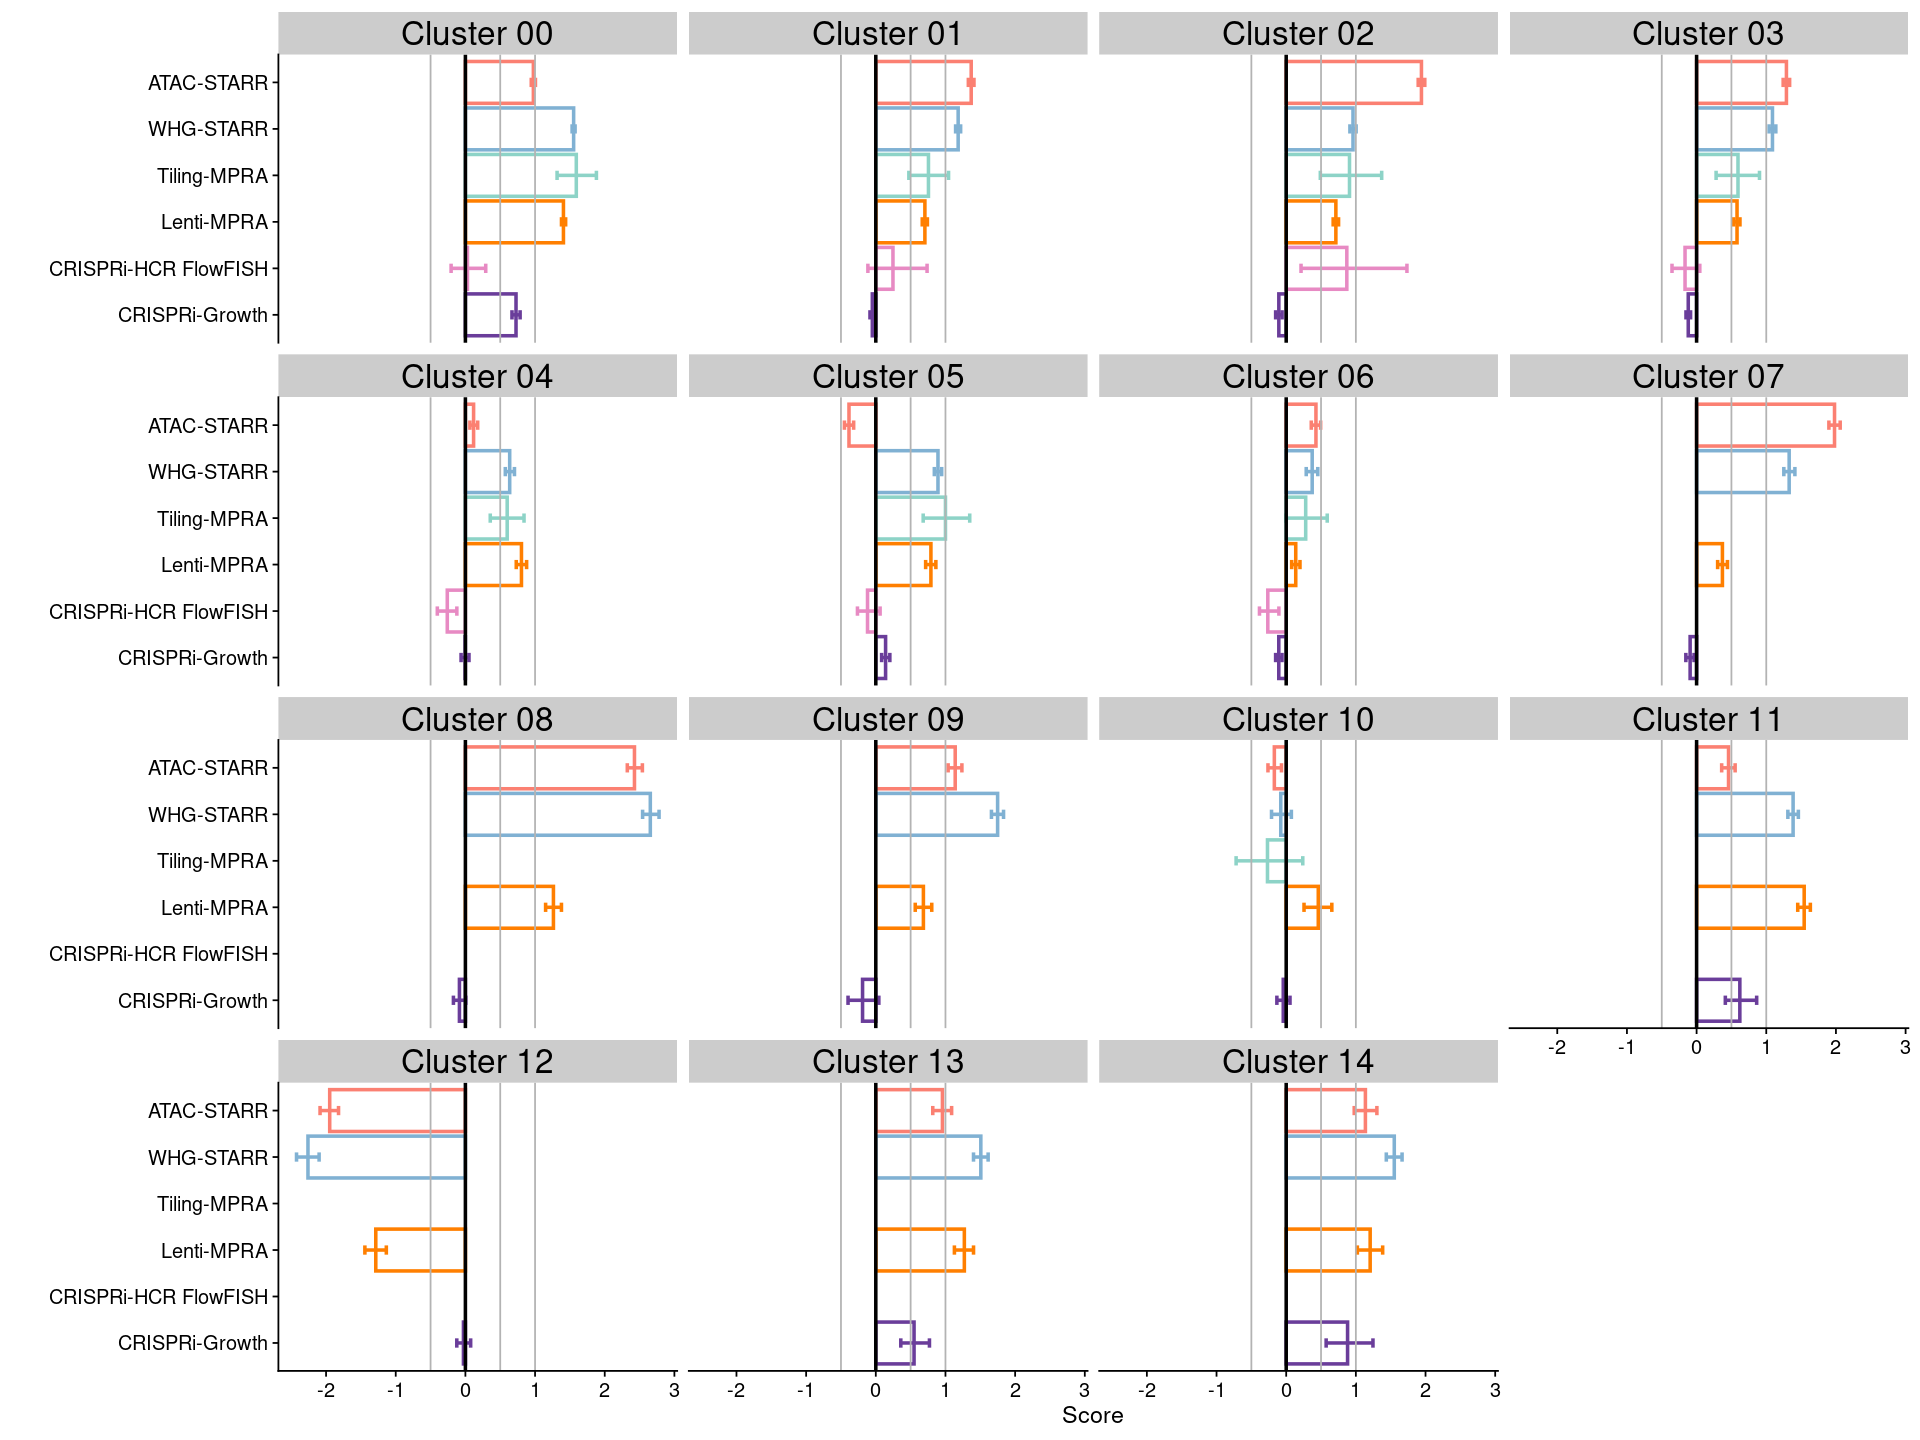

In [101]:
vec_txt_color = c(
    "ATAC-STARR" = "#fb8072", 
    "WHG-STARR" = "#80b1d3", 
    "Tiling-MPRA"  = "#8dd3c7", 
    "Lenti-MPRA"  = "#ff7f00",
    "CRISPRi-HCR FlowFISH"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

dat = dat_region_score_summary
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::filter(Assay %in% vec_txt_assay) %>%
    dplyr::filter(Group %in% vec_txt_label) %>%
    dplyr::mutate(
        Group = factor(Group, levels=vec_txt_label),
        Assay = factor(Assay, levels=rev(vec_txt_assay))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Assay, 
            y     = Mean,
            group = Group,
            color = Assay
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Assay, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Group, 
            color = Assay
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Group, nrow=4) +
    theme(legend.position = "None",
          strip.text = element_text(size=20),
         ) 

options(repr.plot.height=12, repr.plot.width = 16)
print(gpt)

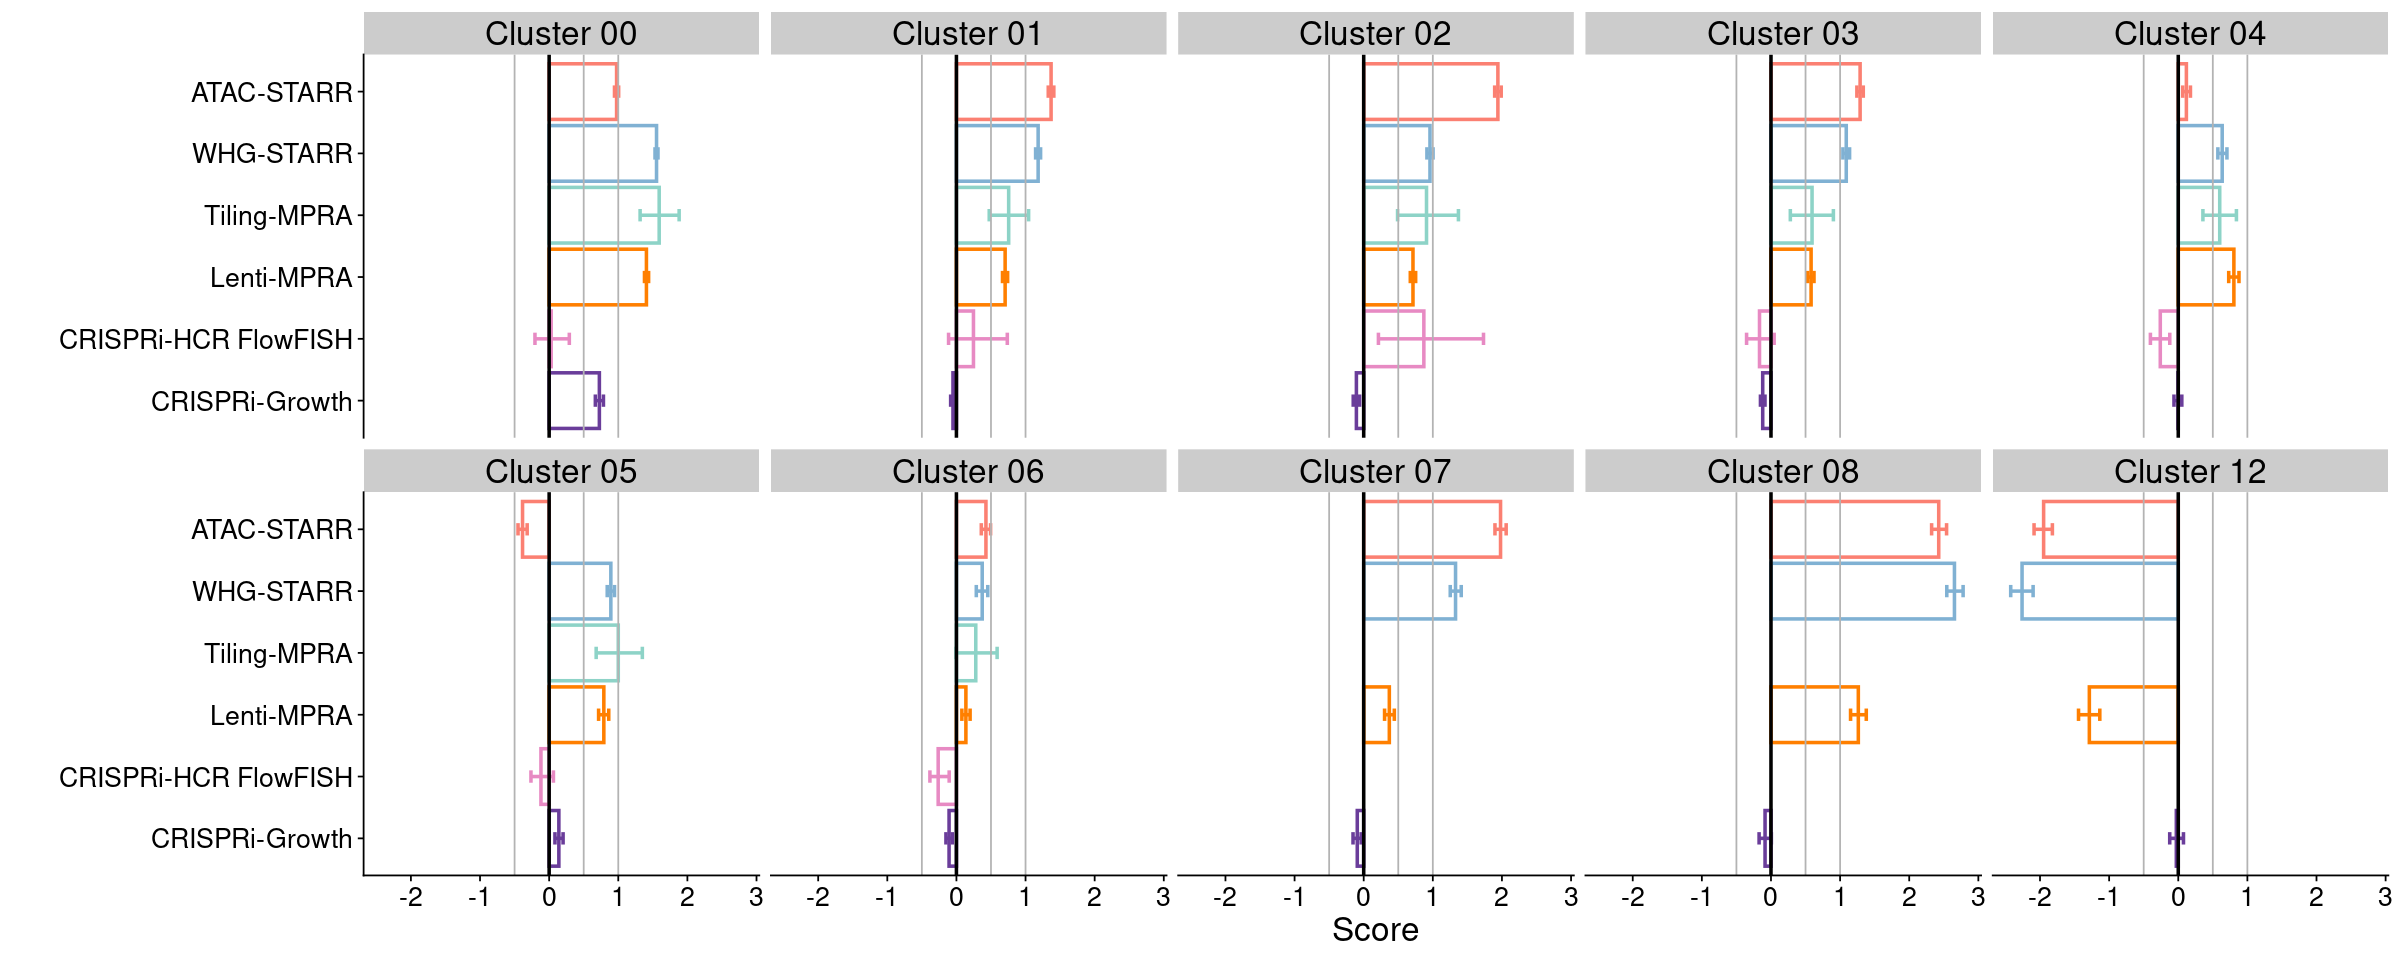

In [110]:
vec_txt_color = c(
    "ATAC-STARR" = "#fb8072", 
    "WHG-STARR" = "#80b1d3", 
    "Tiling-MPRA"  = "#8dd3c7", 
    "Lenti-MPRA"  = "#ff7f00",
    "CRISPRi-HCR FlowFISH"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

vec = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 12)
vec = str_pad(vec, width = 2, pad = "0")
vec = paste("Cluster", vec)
vec_txt_label_selected = vec

dat = dat_region_score_summary
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::filter(Assay %in% vec_txt_assay) %>%
    dplyr::filter(Group %in% vec_txt_label) %>%
    dplyr::filter(Group %in% vec_txt_label_selected) %>%
    dplyr::mutate(
        Group = factor(Group, levels=vec_txt_label),
        Assay = factor(Assay, levels=rev(vec_txt_assay))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Assay, 
            y     = Mean,
            group = Group,
            color = Assay
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Assay, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Group, 
            color = Assay
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Group, nrow=2) +
    theme(
        legend.position = "None",
        axis.text  = element_text(size=16), 
        axis.title = element_text(size=20), 
        strip.text = element_text(size=20)#,
        #strip.background = element_blank()
    )

options(repr.plot.height=8, repr.plot.width = 20)
print(gpt)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's colour
values.”


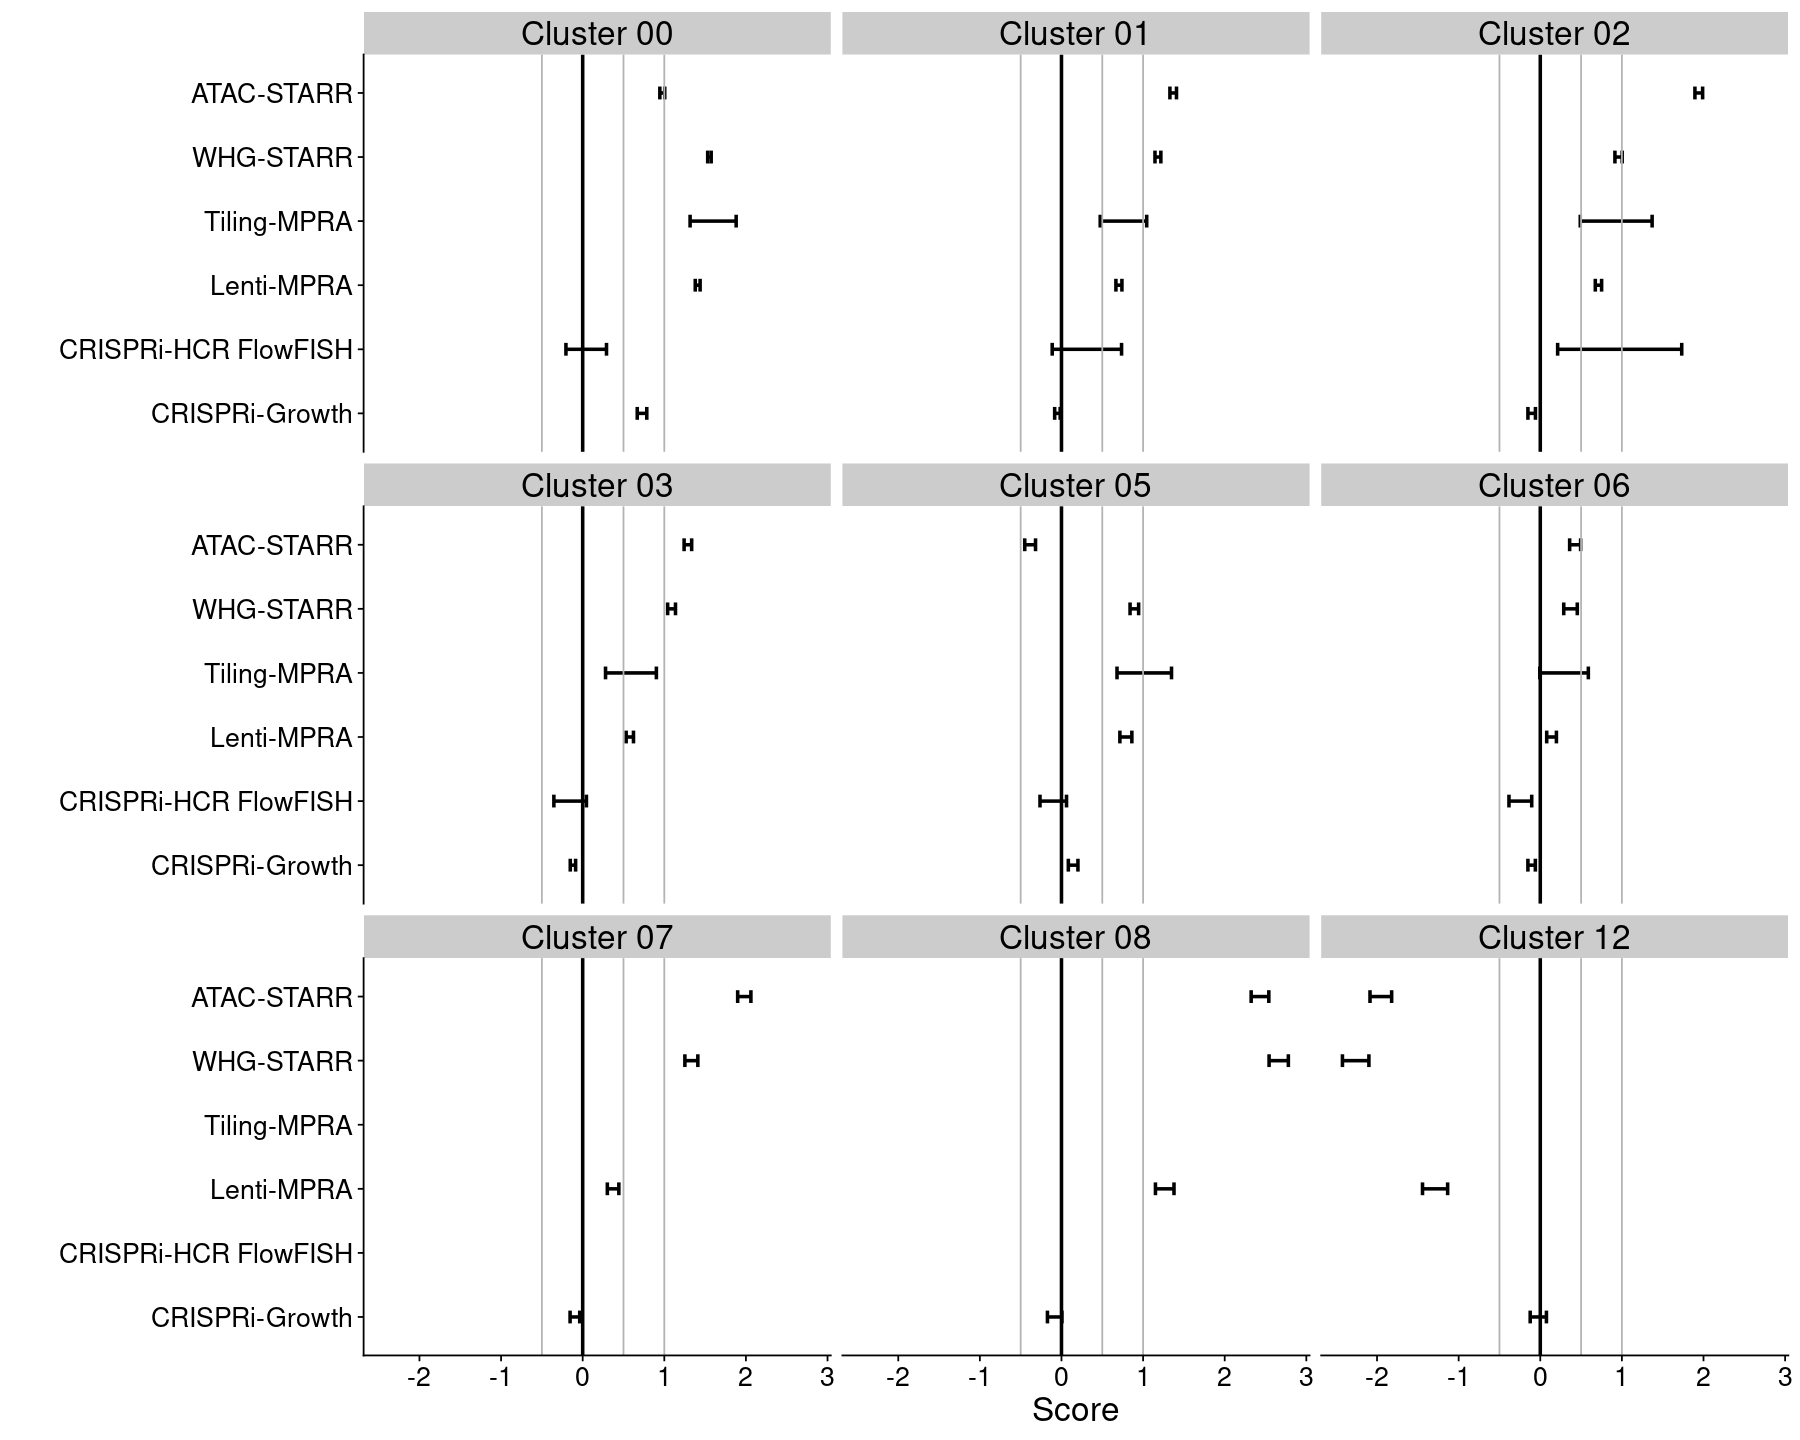

In [115]:
vec_txt_color = c(
    "ATAC-STARR" = "#fb8072", 
    "WHG-STARR" = "#80b1d3", 
    "Tiling-MPRA"  = "#8dd3c7", 
    "Lenti-MPRA"  = "#ff7f00",
    "CRISPRi-HCR FlowFISH"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

vec = c(0, 1, 2, 3, 5, 6, 7, 8, 12)
vec = str_pad(vec, width = 2, pad = "0")
vec = paste("Cluster", vec)
vec_txt_label_selected = vec

dat = dat_region_score_summary
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::filter(Assay %in% vec_txt_assay) %>%
    dplyr::filter(Group %in% vec_txt_label) %>%
    dplyr::filter(Group %in% vec_txt_label_selected) %>%
    dplyr::mutate(
        Group = factor(Group, levels=vec_txt_label),
        Assay = factor(Assay, levels=rev(vec_txt_assay))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Assay, 
            y     = Mean,
            group = Group#,
            #color = Assay
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Assay, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Group#, 
            #color = Assay
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Group, nrow=3) +
    theme(
        legend.position = "None",
        axis.text  = element_text(size=16), 
        axis.title = element_text(size=20), 
        strip.text = element_text(size=20)#,
        #strip.background = element_blank()
    )

options(repr.plot.height=12, repr.plot.width = 15)
print(gpt)